In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  
import statsmodels.api as sm
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Necessary imports
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
%matplotlib inline

pd.set_option('display.max_columns', 999)

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [2]:
#Read Data

#18-19 season
nba_18_19_main = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Main/nba_18_19.csv')
nba_18_19_allowed = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Opposing/allowed_18_19.csv')
nba_18_19_advanced = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Advanced/advstats_18_19.csv')

#17-18 season
nba_17_18_main = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Main/nba_17_18.csv')
nba_17_18_allowed = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Opposing/allowed_17_18.csv')
nba_17_18_advanced = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Advanced/advstats_17_18.csv')

#16-17 season
nba_16_17_main = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Main/nba_16_17.csv')
nba_16_17_allowed = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Opposing/allowed_16_17.csv')
nba_16_17_advanced = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Advanced/advstats_16_17.csv')

#15-16 season
nba_15_16_main = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Main/nba_15_16.csv')
nba_15_16_allowed = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Opposing/allowed_15_16.csv')
nba_15_16_advanced = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Advanced/advstats_15_16.csv')

#14-15 season
nba_14_15_main = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Main/nba_14_15.csv')
nba_14_15_allowed = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Opposing/allowed_14_15.csv')
nba_14_15_advanced = pd.read_csv('/Users/jeromerufin/Desktop/Metis/Week_2/Project_2/Advanced/advstats_14_15.csv')

In [3]:
#Merge Data

#18-19 season
nba_18_19_pt1 = pd.merge(nba_18_19_main,nba_18_19_allowed,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])
nba_18_19_merge = pd.merge(nba_18_19_pt1,nba_18_19_advanced,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])

#17-18 season
nba_17_18_pt1 = pd.merge(nba_17_18_main,nba_17_18_allowed,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])
nba_17_18_merge = pd.merge(nba_17_18_pt1,nba_17_18_advanced,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])

#16-17 season
nba_16_17_pt1 = pd.merge(nba_16_17_main,nba_16_17_allowed,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])
nba_16_17_merge = pd.merge(nba_16_17_pt1,nba_16_17_advanced,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])

#15-16 season
nba_15_16_pt1 = pd.merge(nba_15_16_main,nba_15_16_allowed,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])
nba_15_16_merge = pd.merge(nba_15_16_pt1,nba_15_16_advanced,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])

#14-15 season
nba_14_15_pt1 = pd.merge(nba_14_15_main,nba_14_15_allowed,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])
nba_14_15_merge = pd.merge(nba_14_15_pt1,nba_14_15_advanced,left_on = ['date_game','team_name'],right_on = ['date_game','team_name'])

In [4]:
def date_indicator(row):
    if row['date_game'] > '2018-10-01':
        return(4)
    elif row['date_game'] > '2017-10-01' and row['date_game'] < '2018-10-01':
        return(3)
    elif row['date_game'] > '2016-10-01' and row['date_game'] < '2017-10-01':
        return(2)
    elif row['date_game'] > '2015-10-01' and row['date_game'] < '2016-10-01':
        return(1)
    else:
        return(0)

In [5]:
nbaDictwest = {
'Atlanta Hawks': 0,
'Brooklyn Nets': 0,
'Boston Celtics': 0,
'Charlotte Hornets': 0,
'Chicago Bulls': 0,
'Cleveland Cavaliers': 0,
'Dallas Mavericks': 1,
'Denver Nuggets': 1,
'Detroit Pistons': 0,
'Golden State Warriors': 1,
'Houston Rockets': 1,
'Indiana Pacers': 0,
'Los Angeles Clippers': 1,
'Los Angeles Lakers': 1,
'Memphis Grizzlies': 1,
'Miami Heat': 0,
'Milwaukee Bucks': 0,
'Minnesota Timberwolves': 1,
'New Orleans Pelicans': 1,
'New York Knicks': 0,
'Oklahoma City Thunder': 1,
'Orlando Magic': 0,
'Philadelphia 76ers': 0,
'Phoenix Suns': 1,
'Portland Trail Blazers': 1,
'Sacramento Kings': 1,
'San Antonio Spurs': 1,
'Toronto Raptors': 0,
'Utah Jazz': 1,
'Washington Wizards': 0}

nba_18_19_merge['Team West?'] = nba_18_19_merge.apply(lambda row: nbaDictwest[row['team_name']],axis=1)
nba_18_19_merge['Opp West?'] = nba_18_19_merge.apply(lambda row: nbaDictwest[row['opposing_team_x']],axis=1)
nba_17_18_merge['Team West?'] = nba_17_18_merge.apply(lambda row: nbaDictwest[row['team_name']],axis=1)
nba_17_18_merge['Opp West?'] = nba_17_18_merge.apply(lambda row: nbaDictwest[row['opposing_team_x']],axis=1)
nba_16_17_merge['Team West?'] = nba_16_17_merge.apply(lambda row: nbaDictwest[row['team_name']],axis=1)
nba_16_17_merge['Opp West?'] = nba_16_17_merge.apply(lambda row: nbaDictwest[row['opposing_team_x']],axis=1)
nba_15_16_merge['Team West?'] = nba_15_16_merge.apply(lambda row: nbaDictwest[row['team_name']],axis=1)
nba_15_16_merge['Opp West?'] = nba_15_16_merge.apply(lambda row: nbaDictwest[row['opposing_team_x']],axis=1)
nba_14_15_merge['Team West?'] = nba_14_15_merge.apply(lambda row: nbaDictwest[row['team_name']],axis=1)
nba_14_15_merge['Opp West?'] = nba_14_15_merge.apply(lambda row: nbaDictwest[row['opposing_team_x']],axis=1)

In [6]:
nba_18_19_merge.head()

,Unnamed: 0_x,date_game,game_start_time,team_name,team_pts,opposing_team_x,opposing_team_pts,box_score_text,game_remarks,Team Home?,Avg Team Pts,Avg Team FG,Avg Team FGA,Avg Team FG %,Avg Team 3P,Avg Team 3PA,Avg Team 3P%,Avg Team FT,Avg Team FTA,Avg Team FT%,Avg Team ORB,Avg Team DRB,Avg Team TRB,Avg Team AST,Avg Team STL,Avg Team BLK,Avg Team TOV,Avg Team PF,Team Time between previous game,Team_Win_Pct,Avg Opp Pts,Avg Opp FG,Avg Opp FGA,Avg Opp FG %,Avg Opp 3P,Avg Opp 3PA,Avg Opp 3P%,Avg Opp FT,Avg Opp FTA,Avg Opp FT%,Avg Opp ORB,Avg Opp DRB,Avg Opp TRB,Avg Opp AST,Avg Opp STL,Avg Opp BLK,Avg Opp TOV,Avg Opp PF,Opp Time between previous game,Opp_Win_Pct,Team B2B?,Opp B2B?,Team West?,Opp West?,Unnamed: 0_y,opposing_team_y,team_avg_allowed,opp_avg_allowed,Unnamed: 0,opposing_team,Team TS%,Team eFG%,Team ORtg,Opp TS%,Opp eFG%,Opp ORtg
0,0,2018-10-17,7:30p,Atlanta Hawks,107,New York Knicks,126,https://www.basketball-reference.com/boxscores...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,New York Knicks,NaN,NaN,0,New York Knicks,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-10-19,8:00p,Atlanta Hawks,117,Memphis Grizzlies,131,https://www.basketball-reference.com/boxscores...,NaN,0,107.0,41.000000,90.000000,0.45600,10.000000,36.000000,0.278000,15.00,18.000000,0.83300,7.00,38.0,45.00,19.0,7.000000,3.00,24.000000,30.000000,2 days 00:00:00.000000000,0.000000,83.000000,25.000000,84.0,0.2980,10.0,29.000000,0.345000,23.000000,28.0,0.821000,7.000000,21.000000,28.000000,16.000000,11.000000,3.0,7.000000,18.0,2 days 00:00:00.000000000,0.000000,0,0,0,1,1,Memphis Grizzlies,126.000000,111.0,1,Memphis Grizzlies,0.546000,0.511000,94.300000,0.431000,0.3570,88.80
2,2,2018-10-21,6:00p,Atlanta Hawks,133,Cleveland Cavaliers,111,https://www.basketball-reference.com/boxscores...,NaN,0,112.0,41.000000,86.500000,0.47500,12.000000,33.000000,0.372500,18.00,27.000000,0.70800,9.00,33.5,42.50,23.0,8.000000,4.00,21.500000,30.500000,2 days 00:00:00.000000000,0.000000,113.500000,39.500000,89.0,0.4420,7.5,21.000000,0.358000,27.000000,34.0,0.803000,13.500000,32.500000,46.000000,21.500000,4.500000,1.0,15.000000,24.5,2 days 00:00:00.000000000,0.000000,0,0,0,0,2,Cleveland Cavaliers,128.500000,123.5,2,Cleveland Cavaliers,0.569000,0.544500,102.350000,0.545500,0.4840,111.35
3,3,2018-10-24,7:00p,Atlanta Hawks,111,Dallas Mavericks,104,https://www.basketball-reference.com/boxscores...,NaN,1,119.0,43.333333,90.333333,0.48000,15.333333,37.666667,0.404333,17.00,24.333333,0.73500,9.00,34.0,43.00,26.0,8.333333,5.00,18.333333,27.333333,3 days 00:00:00.000000000,0.333333,118.333333,42.333333,93.0,0.4540,14.0,43.333333,0.320667,19.666667,25.0,0.795667,12.666667,27.666667,40.333333,27.333333,7.666667,5.0,13.333333,20.0,2 days 00:00:00.000000000,0.666667,0,0,0,1,3,Dallas Mavericks,122.666667,122.0,3,Dallas Mavericks,0.587667,0.563667,110.066667,0.566333,0.5290,117.70
4,4,2018-10-27,7:30p,Atlanta Hawks,85,Chicago Bulls,97,https://www.basketball-reference.com/boxscores...,NaN,1,117.0,41.750000,90.500000,0.46175,15.250000,37.750000,0.402000,18.25,26.000000,0.72875,9.25,36.5,45.75,26.5,7.750000,5.25,17.500000,27.000000,3 days 00:00:00.000000000,0.500000,110.200000,40.600000,86.0,0.4742,11.4,28.400000,0.404000,17.600000,23.2,0.750400,6.800000,31.800000,38.600000,22.800000,4.600000,5.0,13.800000,22.4,1 days 00:00:00.000000000,0.200000,0,1,0,0,4,Chicago Bulls,118.000000,121.0,4,Chicago Bulls,0.573250,0.545000,108.225000,0.574800,0.5408,110.88


In [7]:
#Clean datasets and add new columns

merge_list = [nba_18_19_merge,nba_17_18_merge,nba_16_17_merge,nba_15_16_merge,nba_14_15_merge]

nba_18_19_merge = nba_18_19_merge.drop(['Unnamed: 0_x','game_start_time','box_score_text','game_remarks','Team Time between previous game','Opp Time between previous game','Unnamed: 0_y','opposing_team_y','Unnamed: 0','opposing_team'],axis = 1)
nba_18_19_merge['Pts Difference'] = nba_18_19_merge['team_pts'] - nba_18_19_merge['opposing_team_pts']
nba_18_19_merge['Avg Pts Sum'] = nba_18_19_merge['Avg Team Pts'] + nba_18_19_merge['Avg Opp Pts']
nba_18_19_merge['Avg FG Sum'] = nba_18_19_merge['Avg Team FG'] + nba_18_19_merge['Avg Opp FG']
nba_18_19_merge['Avg FGA Sum'] = nba_18_19_merge['Avg Team FGA'] + nba_18_19_merge['Avg Opp FGA']
nba_18_19_merge['Avg FG% Sum'] = nba_18_19_merge['Avg Team FG %'] + nba_18_19_merge['Avg Opp FG %']
nba_18_19_merge['Avg 3P Sum'] = nba_18_19_merge['Avg Team 3P'] + nba_18_19_merge['Avg Opp 3P']
nba_18_19_merge['Avg 3PA Sum'] = nba_18_19_merge['Avg Team 3PA'] + nba_18_19_merge['Avg Opp 3PA']
nba_18_19_merge['Avg 3P% Sum'] = nba_18_19_merge['Avg Team 3P%'] + nba_18_19_merge['Avg Opp 3P%']
nba_18_19_merge['Avg FT Sum'] = nba_18_19_merge['Avg Team FT'] + nba_18_19_merge['Avg Opp FT']
nba_18_19_merge['Avg FTA Sum'] = nba_18_19_merge['Avg Team FTA'] + nba_18_19_merge['Avg Opp FTA']
nba_18_19_merge['Avg FT% Sum'] = nba_18_19_merge['Avg Team FT%'] + nba_18_19_merge['Avg Opp FT%']
nba_18_19_merge['Avg ORB Sum'] = nba_18_19_merge['Avg Team ORB'] + nba_18_19_merge['Avg Opp ORB']
nba_18_19_merge['Avg DRB Sum'] = nba_18_19_merge['Avg Team DRB'] + nba_18_19_merge['Avg Opp DRB']
nba_18_19_merge['Avg TRB Sum'] = nba_18_19_merge['Avg Team TRB'] + nba_18_19_merge['Avg Opp TRB']
nba_18_19_merge['Avg AST Sum'] = nba_18_19_merge['Avg Team AST'] + nba_18_19_merge['Avg Opp AST']
nba_18_19_merge['Avg STL Sum'] = nba_18_19_merge['Avg Team STL'] + nba_18_19_merge['Avg Opp STL']
nba_18_19_merge['Avg BLK Sum'] = nba_18_19_merge['Avg Team BLK'] + nba_18_19_merge['Avg Opp BLK']
nba_18_19_merge['Avg TOV Sum'] = nba_18_19_merge['Avg Team TOV'] + nba_18_19_merge['Avg Opp TOV']
nba_18_19_merge['Avg PF Sum'] = nba_18_19_merge['Avg Team PF'] + nba_18_19_merge['Avg Opp PF']
nba_18_19_merge['Avg Win% Sum'] = nba_18_19_merge['Team_Win_Pct'] + nba_18_19_merge['Opp_Win_Pct']
nba_18_19_merge['Avg Pts Diff'] = nba_18_19_merge['Avg Team Pts'] - nba_18_19_merge['Avg Opp Pts']
nba_18_19_merge['Avg FG Diff'] = nba_18_19_merge['Avg Team FG'] - nba_18_19_merge['Avg Opp FG']
nba_18_19_merge['Avg FGA Diff'] = nba_18_19_merge['Avg Team FGA'] - nba_18_19_merge['Avg Opp FGA']
nba_18_19_merge['Avg FG% Diff'] = nba_18_19_merge['Avg Team FG %'] - nba_18_19_merge['Avg Opp FG %']
nba_18_19_merge['Avg 3P Diff'] = nba_18_19_merge['Avg Team 3P'] - nba_18_19_merge['Avg Opp 3P']
nba_18_19_merge['Avg 3PA Diff'] = nba_18_19_merge['Avg Team 3PA'] - nba_18_19_merge['Avg Opp 3PA']
nba_18_19_merge['Avg 3P% Diff'] = nba_18_19_merge['Avg Team 3P%'] - nba_18_19_merge['Avg Opp 3P%']
nba_18_19_merge['Avg FT Diff'] = nba_18_19_merge['Avg Team FT'] - nba_18_19_merge['Avg Opp FT']
nba_18_19_merge['Avg FTA Diff'] = nba_18_19_merge['Avg Team FTA'] - nba_18_19_merge['Avg Opp FTA']
nba_18_19_merge['Avg FT% Diff'] = nba_18_19_merge['Avg Team FT%'] - nba_18_19_merge['Avg Opp FT%']
nba_18_19_merge['Avg ORB Diff'] = nba_18_19_merge['Avg Team ORB'] - nba_18_19_merge['Avg Opp ORB']
nba_18_19_merge['Avg DRB Diff'] = nba_18_19_merge['Avg Team DRB'] - nba_18_19_merge['Avg Opp DRB']
nba_18_19_merge['Avg TRB Diff'] = nba_18_19_merge['Avg Team TRB'] - nba_18_19_merge['Avg Opp TRB']
nba_18_19_merge['Avg AST Diff'] = nba_18_19_merge['Avg Team AST'] - nba_18_19_merge['Avg Opp AST']
nba_18_19_merge['Avg STL Diff'] = nba_18_19_merge['Avg Team STL'] - nba_18_19_merge['Avg Opp STL']
nba_18_19_merge['Avg BLK Diff'] = nba_18_19_merge['Avg Team BLK'] - nba_18_19_merge['Avg Opp BLK']
nba_18_19_merge['Avg TOV Diff'] = nba_18_19_merge['Avg Team TOV'] - nba_18_19_merge['Avg Opp TOV']
nba_18_19_merge['Avg PF Diff'] = nba_18_19_merge['Avg Team PF'] - nba_18_19_merge['Avg Opp PF']
nba_18_19_merge['Avg Win% Diff'] = nba_18_19_merge['Team_Win_Pct'] - nba_18_19_merge['Opp_Win_Pct']
nba_18_19_merge['Date_indic'] = nba_18_19_merge.apply(date_indicator,axis=1)
nba_18_19_merge['Avg TS% Diff'] = nba_18_19_merge['Team TS%'] - nba_18_19_merge['Opp TS%']
nba_18_19_merge['Avg eFG% Diff'] = nba_18_19_merge['Team eFG%'] - nba_18_19_merge['Opp eFG%']
nba_18_19_merge['Avg ORtg Diff'] = nba_18_19_merge['Team ORtg'] - nba_18_19_merge['Opp ORtg']


nba_17_18_merge = nba_17_18_merge.drop(['Unnamed: 0_x','game_start_time','box_score_text','game_remarks','Team Time between previous game','Opp Time between previous game','Unnamed: 0_y','opposing_team_y','Unnamed: 0','opposing_team'],axis = 1)
nba_17_18_merge['Pts Difference'] = nba_17_18_merge['team_pts'] - nba_17_18_merge['opposing_team_pts']
nba_17_18_merge['Avg Pts Sum'] = nba_17_18_merge['Avg Team Pts'] + nba_17_18_merge['Avg Opp Pts']
nba_17_18_merge['Avg FG Sum'] = nba_17_18_merge['Avg Team FG'] + nba_17_18_merge['Avg Opp FG']
nba_17_18_merge['Avg FGA Sum'] = nba_17_18_merge['Avg Team FGA'] + nba_17_18_merge['Avg Opp FGA']
nba_17_18_merge['Avg FG% Sum'] = nba_17_18_merge['Avg Team FG %'] + nba_17_18_merge['Avg Opp FG %']
nba_17_18_merge['Avg 3P Sum'] = nba_17_18_merge['Avg Team 3P'] + nba_17_18_merge['Avg Opp 3P']
nba_17_18_merge['Avg 3PA Sum'] = nba_17_18_merge['Avg Team 3PA'] + nba_17_18_merge['Avg Opp 3PA']
nba_17_18_merge['Avg 3P% Sum'] = nba_17_18_merge['Avg Team 3P%'] + nba_17_18_merge['Avg Opp 3P%']
nba_17_18_merge['Avg FT Sum'] = nba_17_18_merge['Avg Team FT'] + nba_17_18_merge['Avg Opp FT']
nba_17_18_merge['Avg FTA Sum'] = nba_17_18_merge['Avg Team FTA'] + nba_17_18_merge['Avg Opp FTA']
nba_17_18_merge['Avg FT% Sum'] = nba_17_18_merge['Avg Team FT%'] + nba_17_18_merge['Avg Opp FT%']
nba_17_18_merge['Avg ORB Sum'] = nba_17_18_merge['Avg Team ORB'] + nba_17_18_merge['Avg Opp ORB']
nba_17_18_merge['Avg DRB Sum'] = nba_17_18_merge['Avg Team DRB'] + nba_17_18_merge['Avg Opp DRB']
nba_17_18_merge['Avg TRB Sum'] = nba_17_18_merge['Avg Team TRB'] + nba_17_18_merge['Avg Opp TRB']
nba_17_18_merge['Avg AST Sum'] = nba_17_18_merge['Avg Team AST'] + nba_17_18_merge['Avg Opp AST']
nba_17_18_merge['Avg STL Sum'] = nba_17_18_merge['Avg Team STL'] + nba_17_18_merge['Avg Opp STL']
nba_17_18_merge['Avg BLK Sum'] = nba_17_18_merge['Avg Team BLK'] + nba_17_18_merge['Avg Opp BLK']
nba_17_18_merge['Avg TOV Sum'] = nba_17_18_merge['Avg Team TOV'] + nba_17_18_merge['Avg Opp TOV']
nba_17_18_merge['Avg PF Sum'] = nba_17_18_merge['Avg Team PF'] + nba_17_18_merge['Avg Opp PF']
nba_17_18_merge['Avg Win% Sum'] = nba_17_18_merge['Team_Win_Pct'] + nba_17_18_merge['Opp_Win_Pct']
nba_17_18_merge['Avg Pts Diff'] = nba_17_18_merge['Avg Team Pts'] - nba_17_18_merge['Avg Opp Pts']
nba_17_18_merge['Avg FG Diff'] = nba_17_18_merge['Avg Team FG'] - nba_17_18_merge['Avg Opp FG']
nba_17_18_merge['Avg FGA Diff'] = nba_17_18_merge['Avg Team FGA'] - nba_17_18_merge['Avg Opp FGA']
nba_17_18_merge['Avg FG% Diff'] = nba_17_18_merge['Avg Team FG %'] - nba_17_18_merge['Avg Opp FG %']
nba_17_18_merge['Avg 3P Diff'] = nba_17_18_merge['Avg Team 3P'] - nba_17_18_merge['Avg Opp 3P']
nba_17_18_merge['Avg 3PA Diff'] = nba_17_18_merge['Avg Team 3PA'] - nba_17_18_merge['Avg Opp 3PA']
nba_17_18_merge['Avg 3P% Diff'] = nba_17_18_merge['Avg Team 3P%'] - nba_17_18_merge['Avg Opp 3P%']
nba_17_18_merge['Avg FT Diff'] = nba_17_18_merge['Avg Team FT'] - nba_17_18_merge['Avg Opp FT']
nba_17_18_merge['Avg FTA Diff'] = nba_17_18_merge['Avg Team FTA'] - nba_17_18_merge['Avg Opp FTA']
nba_17_18_merge['Avg FT% Diff'] = nba_17_18_merge['Avg Team FT%'] - nba_17_18_merge['Avg Opp FT%']
nba_17_18_merge['Avg ORB Diff'] = nba_17_18_merge['Avg Team ORB'] - nba_17_18_merge['Avg Opp ORB']
nba_17_18_merge['Avg DRB Diff'] = nba_17_18_merge['Avg Team DRB'] - nba_17_18_merge['Avg Opp DRB']
nba_17_18_merge['Avg TRB Diff'] = nba_17_18_merge['Avg Team TRB'] - nba_17_18_merge['Avg Opp TRB']
nba_17_18_merge['Avg AST Diff'] = nba_17_18_merge['Avg Team AST'] - nba_17_18_merge['Avg Opp AST']
nba_17_18_merge['Avg STL Diff'] = nba_17_18_merge['Avg Team STL'] - nba_17_18_merge['Avg Opp STL']
nba_17_18_merge['Avg BLK Diff'] = nba_17_18_merge['Avg Team BLK'] - nba_17_18_merge['Avg Opp BLK']
nba_17_18_merge['Avg TOV Diff'] = nba_17_18_merge['Avg Team TOV'] - nba_17_18_merge['Avg Opp TOV']
nba_17_18_merge['Avg PF Diff'] = nba_17_18_merge['Avg Team PF'] - nba_17_18_merge['Avg Opp PF']
nba_17_18_merge['Avg Win% Diff'] = nba_17_18_merge['Team_Win_Pct'] - nba_17_18_merge['Opp_Win_Pct']
nba_17_18_merge['Date_indic'] = nba_17_18_merge.apply(date_indicator,axis=1)
nba_17_18_merge['Avg TS% Diff'] = nba_17_18_merge['Team TS%'] - nba_17_18_merge['Opp TS%']
nba_17_18_merge['Avg eFG% Diff'] = nba_17_18_merge['Team eFG%'] - nba_17_18_merge['Opp eFG%']
nba_17_18_merge['Avg ORtg Diff'] = nba_17_18_merge['Team ORtg'] - nba_17_18_merge['Opp ORtg']

nba_16_17_merge = nba_16_17_merge.drop(['Unnamed: 0_x','game_start_time','box_score_text','game_remarks','Team Time between previous game','Opp Time between previous game','Unnamed: 0_y','opposing_team_y','Unnamed: 0','opposing_team'],axis = 1)
nba_16_17_merge['Pts Difference'] = nba_16_17_merge['team_pts'] - nba_16_17_merge['opposing_team_pts']
nba_16_17_merge['Avg Pts Sum'] = nba_16_17_merge['Avg Team Pts'] + nba_16_17_merge['Avg Opp Pts']
nba_16_17_merge['Avg FG Sum'] = nba_16_17_merge['Avg Team FG'] + nba_16_17_merge['Avg Opp FG']
nba_16_17_merge['Avg FGA Sum'] = nba_16_17_merge['Avg Team FGA'] + nba_16_17_merge['Avg Opp FGA']
nba_16_17_merge['Avg FG% Sum'] = nba_16_17_merge['Avg Team FG %'] + nba_16_17_merge['Avg Opp FG %']
nba_16_17_merge['Avg 3P Sum'] = nba_16_17_merge['Avg Team 3P'] + nba_16_17_merge['Avg Opp 3P']
nba_16_17_merge['Avg 3PA Sum'] = nba_16_17_merge['Avg Team 3PA'] + nba_16_17_merge['Avg Opp 3PA']
nba_16_17_merge['Avg 3P% Sum'] = nba_16_17_merge['Avg Team 3P%'] + nba_16_17_merge['Avg Opp 3P%']
nba_16_17_merge['Avg FT Sum'] = nba_16_17_merge['Avg Team FT'] + nba_16_17_merge['Avg Opp FT']
nba_16_17_merge['Avg FTA Sum'] = nba_16_17_merge['Avg Team FTA'] + nba_16_17_merge['Avg Opp FTA']
nba_16_17_merge['Avg FT% Sum'] = nba_16_17_merge['Avg Team FT%'] + nba_16_17_merge['Avg Opp FT%']
nba_16_17_merge['Avg ORB Sum'] = nba_16_17_merge['Avg Team ORB'] + nba_16_17_merge['Avg Opp ORB']
nba_16_17_merge['Avg DRB Sum'] = nba_16_17_merge['Avg Team DRB'] + nba_16_17_merge['Avg Opp DRB']
nba_16_17_merge['Avg TRB Sum'] = nba_16_17_merge['Avg Team TRB'] + nba_16_17_merge['Avg Opp TRB']
nba_16_17_merge['Avg AST Sum'] = nba_16_17_merge['Avg Team AST'] + nba_16_17_merge['Avg Opp AST']
nba_16_17_merge['Avg STL Sum'] = nba_16_17_merge['Avg Team STL'] + nba_16_17_merge['Avg Opp STL']
nba_16_17_merge['Avg BLK Sum'] = nba_16_17_merge['Avg Team BLK'] + nba_16_17_merge['Avg Opp BLK']
nba_16_17_merge['Avg TOV Sum'] = nba_16_17_merge['Avg Team TOV'] + nba_16_17_merge['Avg Opp TOV']
nba_16_17_merge['Avg PF Sum'] = nba_16_17_merge['Avg Team PF'] + nba_16_17_merge['Avg Opp PF']
nba_16_17_merge['Avg Win% Sum'] = nba_16_17_merge['Team_Win_Pct'] + nba_16_17_merge['Opp_Win_Pct']
nba_16_17_merge['Avg Pts Diff'] = nba_16_17_merge['Avg Team Pts'] - nba_16_17_merge['Avg Opp Pts']
nba_16_17_merge['Avg FG Diff'] = nba_16_17_merge['Avg Team FG'] - nba_16_17_merge['Avg Opp FG']
nba_16_17_merge['Avg FGA Diff'] = nba_16_17_merge['Avg Team FGA'] - nba_16_17_merge['Avg Opp FGA']
nba_16_17_merge['Avg FG% Diff'] = nba_16_17_merge['Avg Team FG %'] - nba_16_17_merge['Avg Opp FG %']
nba_16_17_merge['Avg 3P Diff'] = nba_16_17_merge['Avg Team 3P'] - nba_16_17_merge['Avg Opp 3P']
nba_16_17_merge['Avg 3PA Diff'] = nba_16_17_merge['Avg Team 3PA'] - nba_16_17_merge['Avg Opp 3PA']
nba_16_17_merge['Avg 3P% Diff'] = nba_16_17_merge['Avg Team 3P%'] - nba_16_17_merge['Avg Opp 3P%']
nba_16_17_merge['Avg FT Diff'] = nba_16_17_merge['Avg Team FT'] - nba_16_17_merge['Avg Opp FT']
nba_16_17_merge['Avg FTA Diff'] = nba_16_17_merge['Avg Team FTA'] - nba_16_17_merge['Avg Opp FTA']
nba_16_17_merge['Avg FT% Diff'] = nba_16_17_merge['Avg Team FT%'] - nba_16_17_merge['Avg Opp FT%']
nba_16_17_merge['Avg ORB Diff'] = nba_16_17_merge['Avg Team ORB'] - nba_16_17_merge['Avg Opp ORB']
nba_16_17_merge['Avg DRB Diff'] = nba_16_17_merge['Avg Team DRB'] - nba_16_17_merge['Avg Opp DRB']
nba_16_17_merge['Avg TRB Diff'] = nba_16_17_merge['Avg Team TRB'] - nba_16_17_merge['Avg Opp TRB']
nba_16_17_merge['Avg AST Diff'] = nba_16_17_merge['Avg Team AST'] - nba_16_17_merge['Avg Opp AST']
nba_16_17_merge['Avg STL Diff'] = nba_16_17_merge['Avg Team STL'] - nba_16_17_merge['Avg Opp STL']
nba_16_17_merge['Avg BLK Diff'] = nba_16_17_merge['Avg Team BLK'] - nba_16_17_merge['Avg Opp BLK']
nba_16_17_merge['Avg TOV Diff'] = nba_16_17_merge['Avg Team TOV'] - nba_16_17_merge['Avg Opp TOV']
nba_16_17_merge['Avg PF Diff'] = nba_16_17_merge['Avg Team PF'] - nba_16_17_merge['Avg Opp PF']
nba_16_17_merge['Avg Win% Diff'] = nba_16_17_merge['Team_Win_Pct'] - nba_16_17_merge['Opp_Win_Pct']
nba_16_17_merge['Date_indic'] = nba_16_17_merge.apply(date_indicator,axis=1)
nba_16_17_merge['Avg TS% Diff'] = nba_16_17_merge['Team TS%'] - nba_16_17_merge['Opp TS%']
nba_16_17_merge['Avg eFG% Diff'] = nba_16_17_merge['Team eFG%'] - nba_16_17_merge['Opp eFG%']
nba_16_17_merge['Avg ORtg Diff'] = nba_16_17_merge['Team ORtg'] - nba_16_17_merge['Opp ORtg']

nba_15_16_merge = nba_15_16_merge.drop(['Unnamed: 0_x','game_start_time','box_score_text','game_remarks','Team Time between previous game','Opp Time between previous game','Unnamed: 0_y','opposing_team_y','Unnamed: 0','opposing_team'],axis = 1)
nba_15_16_merge['Pts Difference'] = nba_15_16_merge['team_pts'] - nba_15_16_merge['opposing_team_pts']
nba_15_16_merge['Avg Pts Sum'] = nba_15_16_merge['Avg Team Pts'] + nba_15_16_merge['Avg Opp Pts']
nba_15_16_merge['Avg FG Sum'] = nba_15_16_merge['Avg Team FG'] + nba_15_16_merge['Avg Opp FG']
nba_15_16_merge['Avg FGA Sum'] = nba_15_16_merge['Avg Team FGA'] + nba_15_16_merge['Avg Opp FGA']
nba_15_16_merge['Avg FG% Sum'] = nba_15_16_merge['Avg Team FG %'] + nba_15_16_merge['Avg Opp FG %']
nba_15_16_merge['Avg 3P Sum'] = nba_15_16_merge['Avg Team 3P'] + nba_15_16_merge['Avg Opp 3P']
nba_15_16_merge['Avg 3PA Sum'] = nba_15_16_merge['Avg Team 3PA'] + nba_15_16_merge['Avg Opp 3PA']
nba_15_16_merge['Avg 3P% Sum'] = nba_15_16_merge['Avg Team 3P%'] + nba_15_16_merge['Avg Opp 3P%']
nba_15_16_merge['Avg FT Sum'] = nba_15_16_merge['Avg Team FT'] + nba_15_16_merge['Avg Opp FT']
nba_15_16_merge['Avg FTA Sum'] = nba_15_16_merge['Avg Team FTA'] + nba_15_16_merge['Avg Opp FTA']
nba_15_16_merge['Avg FT% Sum'] = nba_15_16_merge['Avg Team FT%'] + nba_15_16_merge['Avg Opp FT%']
nba_15_16_merge['Avg ORB Sum'] = nba_15_16_merge['Avg Team ORB'] + nba_15_16_merge['Avg Opp ORB']
nba_15_16_merge['Avg DRB Sum'] = nba_15_16_merge['Avg Team DRB'] + nba_15_16_merge['Avg Opp DRB']
nba_15_16_merge['Avg TRB Sum'] = nba_15_16_merge['Avg Team TRB'] + nba_15_16_merge['Avg Opp TRB']
nba_15_16_merge['Avg AST Sum'] = nba_15_16_merge['Avg Team AST'] + nba_15_16_merge['Avg Opp AST']
nba_15_16_merge['Avg STL Sum'] = nba_15_16_merge['Avg Team STL'] + nba_15_16_merge['Avg Opp STL']
nba_15_16_merge['Avg BLK Sum'] = nba_15_16_merge['Avg Team BLK'] + nba_15_16_merge['Avg Opp BLK']
nba_15_16_merge['Avg TOV Sum'] = nba_15_16_merge['Avg Team TOV'] + nba_15_16_merge['Avg Opp TOV']
nba_15_16_merge['Avg PF Sum'] = nba_15_16_merge['Avg Team PF'] + nba_15_16_merge['Avg Opp PF']
nba_15_16_merge['Avg Win% Sum'] = nba_15_16_merge['Team_Win_Pct'] + nba_15_16_merge['Opp_Win_Pct']
nba_15_16_merge['Avg Pts Diff'] = nba_15_16_merge['Avg Team Pts'] - nba_15_16_merge['Avg Opp Pts']
nba_15_16_merge['Avg FG Diff'] = nba_15_16_merge['Avg Team FG'] - nba_15_16_merge['Avg Opp FG']
nba_15_16_merge['Avg FGA Diff'] = nba_15_16_merge['Avg Team FGA'] - nba_15_16_merge['Avg Opp FGA']
nba_15_16_merge['Avg FG% Diff'] = nba_15_16_merge['Avg Team FG %'] - nba_15_16_merge['Avg Opp FG %']
nba_15_16_merge['Avg 3P Diff'] = nba_15_16_merge['Avg Team 3P'] - nba_15_16_merge['Avg Opp 3P']
nba_15_16_merge['Avg 3PA Diff'] = nba_15_16_merge['Avg Team 3PA'] - nba_15_16_merge['Avg Opp 3PA']
nba_15_16_merge['Avg 3P% Diff'] = nba_15_16_merge['Avg Team 3P%'] - nba_15_16_merge['Avg Opp 3P%']
nba_15_16_merge['Avg FT Diff'] = nba_15_16_merge['Avg Team FT'] - nba_15_16_merge['Avg Opp FT']
nba_15_16_merge['Avg FTA Diff'] = nba_15_16_merge['Avg Team FTA'] - nba_15_16_merge['Avg Opp FTA']
nba_15_16_merge['Avg FT% Diff'] = nba_15_16_merge['Avg Team FT%'] - nba_15_16_merge['Avg Opp FT%']
nba_15_16_merge['Avg ORB Diff'] = nba_15_16_merge['Avg Team ORB'] - nba_15_16_merge['Avg Opp ORB']
nba_15_16_merge['Avg DRB Diff'] = nba_15_16_merge['Avg Team DRB'] - nba_15_16_merge['Avg Opp DRB']
nba_15_16_merge['Avg TRB Diff'] = nba_15_16_merge['Avg Team TRB'] - nba_15_16_merge['Avg Opp TRB']
nba_15_16_merge['Avg AST Diff'] = nba_15_16_merge['Avg Team AST'] - nba_15_16_merge['Avg Opp AST']
nba_15_16_merge['Avg STL Diff'] = nba_15_16_merge['Avg Team STL'] - nba_15_16_merge['Avg Opp STL']
nba_15_16_merge['Avg BLK Diff'] = nba_15_16_merge['Avg Team BLK'] - nba_15_16_merge['Avg Opp BLK']
nba_15_16_merge['Avg TOV Diff'] = nba_15_16_merge['Avg Team TOV'] - nba_15_16_merge['Avg Opp TOV']
nba_15_16_merge['Avg PF Diff'] = nba_15_16_merge['Avg Team PF'] - nba_15_16_merge['Avg Opp PF']
nba_15_16_merge['Avg Win% Diff'] = nba_15_16_merge['Team_Win_Pct'] - nba_15_16_merge['Opp_Win_Pct']
nba_15_16_merge['Date_indic'] = nba_15_16_merge.apply(date_indicator,axis=1)
nba_15_16_merge['Avg TS% Diff'] = nba_15_16_merge['Team TS%'] - nba_15_16_merge['Opp TS%']
nba_15_16_merge['Avg eFG% Diff'] = nba_15_16_merge['Team eFG%'] - nba_15_16_merge['Opp eFG%']
nba_15_16_merge['Avg ORtg Diff'] = nba_15_16_merge['Team ORtg'] - nba_15_16_merge['Opp ORtg']


nba_14_15_merge = nba_14_15_merge.drop(['Unnamed: 0_x','game_start_time','box_score_text','game_remarks','Team Time between previous game','Opp Time between previous game','Unnamed: 0_y','opposing_team_y','Unnamed: 0','opposing_team'],axis = 1)
nba_14_15_merge['Pts Difference'] = nba_14_15_merge['team_pts'] - nba_14_15_merge['opposing_team_pts']
nba_14_15_merge['Avg Pts Sum'] = nba_14_15_merge['Avg Team Pts'] + nba_14_15_merge['Avg Opp Pts']
nba_14_15_merge['Avg FG Sum'] = nba_14_15_merge['Avg Team FG'] + nba_14_15_merge['Avg Opp FG']
nba_14_15_merge['Avg FGA Sum'] = nba_14_15_merge['Avg Team FGA'] + nba_14_15_merge['Avg Opp FGA']
nba_14_15_merge['Avg FG% Sum'] = nba_14_15_merge['Avg Team FG %'] + nba_14_15_merge['Avg Opp FG %']
nba_14_15_merge['Avg 3P Sum'] = nba_14_15_merge['Avg Team 3P'] + nba_14_15_merge['Avg Opp 3P']
nba_14_15_merge['Avg 3PA Sum'] = nba_14_15_merge['Avg Team 3PA'] + nba_14_15_merge['Avg Opp 3PA']
nba_14_15_merge['Avg 3P% Sum'] = nba_14_15_merge['Avg Team 3P%'] + nba_14_15_merge['Avg Opp 3P%']
nba_14_15_merge['Avg FT Sum'] = nba_14_15_merge['Avg Team FT'] + nba_14_15_merge['Avg Opp FT']
nba_14_15_merge['Avg FTA Sum'] = nba_14_15_merge['Avg Team FTA'] + nba_14_15_merge['Avg Opp FTA']
nba_14_15_merge['Avg FT% Sum'] = nba_14_15_merge['Avg Team FT%'] + nba_14_15_merge['Avg Opp FT%']
nba_14_15_merge['Avg ORB Sum'] = nba_14_15_merge['Avg Team ORB'] + nba_14_15_merge['Avg Opp ORB']
nba_14_15_merge['Avg DRB Sum'] = nba_14_15_merge['Avg Team DRB'] + nba_14_15_merge['Avg Opp DRB']
nba_14_15_merge['Avg TRB Sum'] = nba_14_15_merge['Avg Team TRB'] + nba_14_15_merge['Avg Opp TRB']
nba_14_15_merge['Avg AST Sum'] = nba_14_15_merge['Avg Team AST'] + nba_14_15_merge['Avg Opp AST']
nba_14_15_merge['Avg STL Sum'] = nba_14_15_merge['Avg Team STL'] + nba_14_15_merge['Avg Opp STL']
nba_14_15_merge['Avg BLK Sum'] = nba_14_15_merge['Avg Team BLK'] + nba_14_15_merge['Avg Opp BLK']
nba_14_15_merge['Avg TOV Sum'] = nba_14_15_merge['Avg Team TOV'] + nba_14_15_merge['Avg Opp TOV']
nba_14_15_merge['Avg PF Sum'] = nba_14_15_merge['Avg Team PF'] + nba_14_15_merge['Avg Opp PF']
nba_14_15_merge['Avg Win% Sum'] = nba_14_15_merge['Team_Win_Pct'] + nba_14_15_merge['Opp_Win_Pct']
nba_14_15_merge['Avg Pts Diff'] = nba_14_15_merge['Avg Team Pts'] - nba_14_15_merge['Avg Opp Pts']
nba_14_15_merge['Avg FG Diff'] = nba_14_15_merge['Avg Team FG'] - nba_14_15_merge['Avg Opp FG']
nba_14_15_merge['Avg FGA Diff'] = nba_14_15_merge['Avg Team FGA'] - nba_14_15_merge['Avg Opp FGA']
nba_14_15_merge['Avg FG% Diff'] = nba_14_15_merge['Avg Team FG %'] - nba_14_15_merge['Avg Opp FG %']
nba_14_15_merge['Avg 3P Diff'] = nba_14_15_merge['Avg Team 3P'] - nba_14_15_merge['Avg Opp 3P']
nba_14_15_merge['Avg 3PA Diff'] = nba_14_15_merge['Avg Team 3PA'] - nba_14_15_merge['Avg Opp 3PA']
nba_14_15_merge['Avg 3P% Diff'] = nba_14_15_merge['Avg Team 3P%'] - nba_14_15_merge['Avg Opp 3P%']
nba_14_15_merge['Avg FT Diff'] = nba_14_15_merge['Avg Team FT'] - nba_14_15_merge['Avg Opp FT']
nba_14_15_merge['Avg FTA Diff'] = nba_14_15_merge['Avg Team FTA'] - nba_14_15_merge['Avg Opp FTA']
nba_14_15_merge['Avg FT% Diff'] = nba_14_15_merge['Avg Team FT%'] - nba_14_15_merge['Avg Opp FT%']
nba_14_15_merge['Avg ORB Diff'] = nba_14_15_merge['Avg Team ORB'] - nba_14_15_merge['Avg Opp ORB']
nba_14_15_merge['Avg DRB Diff'] = nba_14_15_merge['Avg Team DRB'] - nba_14_15_merge['Avg Opp DRB']
nba_14_15_merge['Avg TRB Diff'] = nba_14_15_merge['Avg Team TRB'] - nba_14_15_merge['Avg Opp TRB']
nba_14_15_merge['Avg AST Diff'] = nba_14_15_merge['Avg Team AST'] - nba_14_15_merge['Avg Opp AST']
nba_14_15_merge['Avg STL Diff'] = nba_14_15_merge['Avg Team STL'] - nba_14_15_merge['Avg Opp STL']
nba_14_15_merge['Avg BLK Diff'] = nba_14_15_merge['Avg Team BLK'] - nba_14_15_merge['Avg Opp BLK']
nba_14_15_merge['Avg TOV Diff'] = nba_14_15_merge['Avg Team TOV'] - nba_14_15_merge['Avg Opp TOV']
nba_14_15_merge['Avg PF Diff'] = nba_14_15_merge['Avg Team PF'] - nba_14_15_merge['Avg Opp PF']
nba_14_15_merge['Avg Win% Diff'] = nba_14_15_merge['Team_Win_Pct'] - nba_14_15_merge['Opp_Win_Pct']
nba_14_15_merge['Date_indic'] = nba_14_15_merge.apply(date_indicator,axis=1)
nba_14_15_merge['Avg TS% Diff'] = nba_14_15_merge['Team TS%'] - nba_14_15_merge['Opp TS%']
nba_14_15_merge['Avg eFG% Diff'] = nba_14_15_merge['Team eFG%'] - nba_14_15_merge['Opp eFG%']
nba_14_15_merge['Avg ORtg Diff'] = nba_14_15_merge['Team ORtg'] - nba_14_15_merge['Opp ORtg']

In [8]:
x = nba_18_19_merge.merge(odds_df,left_on =['date_game','team_name'],right_on = ['Date','Team'],how='outer')

NameError: name 'odds_df' is not defined

In [9]:
odds_df['Date'] = pd.to_datetime(odds_df['Date'])

NameError: name 'odds_df' is not defined

In [10]:
nba_18_19_merge['date_game'] = pd.to_datetime(nba_18_19_merge['date_game'])

In [11]:
y_pred_df_test

NameError: name 'y_pred_df_test' is not defined

In [12]:
y = x.merge(odds_df,left_on =['date_game','opposing_team_x'],right_on = ['Date','Team'], how='outer')
y = x.merge(odds_df,left_on =['date_game','team_name'],right_on = ['Date','Team'], how='outer')


NameError: name 'x' is not defined

In [13]:
x = pd.concat([x.reset_index(),y_pred_df_test.reset_index()],axis=1)
x = x[x['date_game'] > '2019-01-01']
x['odds_y'] = x['odds_y'].fillna(x['odds_x'])

NameError: name 'x' is not defined

In [14]:
x.head()

NameError: name 'x' is not defined

In [15]:
x['Pts Difference'] = x['team_pts'] - x['opposing_team_pts']

NameError: name 'x' is not defined

In [16]:
x = x[['team_name','opposing_team_x','Pts Difference','odds_y','Team_x','Team_y','y_pred_score']]


NameError: name 'x' is not defined

In [17]:
x

NameError: name 'x' is not defined

In [18]:
def money(row):
    if row['y_pred_score'] > 0 and row['Team_y'] == row['opposing_team_x'] and row['Pts Difference'] > 0:
        return(1)
    elif row['y_pred_score'] < 0 and row['Team_y'] == row['opposing_team_x'] and abs(row['Pts Difference']) > row['odds_y']:
        return(1)
    return(0)

x['winner'] = x.apply(money,axis=1)

NameError: name 'x' is not defined

In [19]:
def money(row):
    if row['y_pred_score'] > 0 and row['Team_y'] == row['opposing_team_x'] and row['Pts Difference'] > 0:
        return(1)
    elif row['y_pred_score'] < 0 and row['Team_y'] == row['opposing_team_x'] and row['Pts Difference'] < 0 and abs(row['Pts Difference']) > row['odds_y']:
        return(1)
    elif row['y_pred_score'] < 0 and row['Team_x'] == row['team_name'] and row['Pts Difference'] < 0:
        return(1)
    elif row['y_pred_score'] > 0 and row['Team_x'] == row['team_name'] and row['Pts Difference'] > 0 and abs(row['Pts Difference']) > row['odds_y']:
        return(1)
    return(0)
x['winner'] = x.apply(money,axis=1)

NameError: name 'x' is not defined

In [20]:
x.groupby('winner').winner.count()

NameError: name 'x' is not defined

In [21]:
row ()

NameError: name 'row' is not defined

In [22]:
x = nba_18_19_merge.merge(odds_df,left_on =['date_game','team_name'],right_on = ['Date','Team'],how='outer')

NameError: name 'odds_df' is not defined

In [23]:
x = x.merge(odds_df,left_on =['date_game','opposing_team_x'],right_on = ['Date','Team'],how='outer')

x['Team_y'] = x['Team_y'].fillna(x['Team_x'])


NameError: name 'x' is not defined

In [24]:
x['Team_y'] = x['Team_y'].fillna(x['Team_x'])

NameError: name 'x' is not defined

In [25]:
x['Team_y'] = x['Team_y'].fillna(x['Team_x'])

NameError: name 'x' is not defined

In [26]:
x.head(50)

NameError: name 'x' is not defined

In [27]:
new_list = list(zip(date_list,team_list))
final_list = pd.DataFrame(odds_list)
odds_pd = pd.DataFrame(new_list)

NameError: name 'date_list' is not defined

In [28]:
odds_df = pd.concat([odds_pd,final_list],axis =1)
odds_df.columns = ['Date','Team','odds']

NameError: name 'odds_pd' is not defined

In [29]:
odds_df = odds_df[odds_df['odds']<50]

NameError: name 'odds_df' is not defined

In [30]:
odds_df



NameError: name 'odds_df' is not defined

In [31]:
#Time constraint
nba_18_19_half = nba_18_19_merge[nba_18_19_merge['date_game'] > '2019-01-15']
nba_17_18_half = nba_17_18_merge[nba_17_18_merge['date_game'] > '2018-01-15']
nba_16_17_half = nba_16_17_merge[nba_16_17_merge['date_game'] > '2017-01-15']
nba_15_16_half = nba_15_16_merge[nba_15_16_merge['date_game'] > '2016-01-15']
nba_14_15_half = nba_14_15_merge[nba_14_15_merge['date_game'] > '2015-01-15']

In [32]:
# #Create 80% from first 4 year dataset
# frames_0_4 = [nba_14_15_half,nba_15_16_half,nba_16_17_half,nba_17_18_half]
# nba_14_18 = pd.concat(frames_0_4,ignore_index=True)
# nba_18_19 = nba_18_19_half

In [33]:
frames_0_1 = [nba_14_15_half,nba_15_16_half]
nba_14_16 = pd.concat(frames_0_1,ignore_index=True)
nba_16_17 = nba_16_17_half

frames_1_2 = [nba_15_16_half,nba_16_17_half]
nba_15_17 = pd.concat(frames_1_2,ignore_index=True)
nba_17_18 = nba_17_18_half

frames_2_3 = [nba_16_17_half,nba_17_18_half]
nba_16_18 = pd.concat(frames_2_3,ignore_index=True)
nba_18_19 = nba_18_19_half

frames_0_4 = [nba_14_15_half,nba_15_16_half,nba_16_17_half,nba_17_18_half]
nba_14_18 = pd.concat(frames_0_4,ignore_index=True)
nba_18_19 = nba_18_19_half

In [34]:
nba_18_19_merge[nba_18_19_merge['team_name'] == 'Boston Celtics']

,date_game,team_name,team_pts,opposing_team_x,opposing_team_pts,Team Home?,Avg Team Pts,Avg Team FG,Avg Team FGA,Avg Team FG %,Avg Team 3P,Avg Team 3PA,Avg Team 3P%,Avg Team FT,Avg Team FTA,Avg Team FT%,Avg Team ORB,Avg Team DRB,Avg Team TRB,Avg Team AST,Avg Team STL,Avg Team BLK,Avg Team TOV,Avg Team PF,Team_Win_Pct,Avg Opp Pts,Avg Opp FG,Avg Opp FGA,Avg Opp FG %,Avg Opp 3P,Avg Opp 3PA,Avg Opp 3P%,Avg Opp FT,Avg Opp FTA,Avg Opp FT%,Avg Opp ORB,Avg Opp DRB,Avg Opp TRB,Avg Opp AST,Avg Opp STL,Avg Opp BLK,Avg Opp TOV,Avg Opp PF,Opp_Win_Pct,Team B2B?,Opp B2B?,Team West?,Opp West?,team_avg_allowed,opp_avg_allowed,Team TS%,Team eFG%,Team ORtg,Opp TS%,Opp eFG%,Opp ORtg,Pts Difference,Avg Pts Sum,Avg FG Sum,Avg FGA Sum,Avg FG% Sum,Avg 3P Sum,Avg 3PA Sum,Avg 3P% Sum,Avg FT Sum,Avg FTA Sum,Avg FT% Sum,Avg ORB Sum,Avg DRB Sum,Avg TRB Sum,Avg AST Sum,Avg STL Sum,Avg BLK Sum,Avg TOV Sum,Avg PF Sum,Avg Win% Sum,Avg Pts Diff,Avg FG Diff,Avg FGA Diff,Avg FG% Diff,Avg 3P Diff,Avg 3PA Diff,Avg 3P% Diff,Avg FT Diff,Avg FTA Diff,Avg FT% Diff,Avg ORB Diff,Avg DRB Diff,Avg TRB Diff,Avg AST Diff,Avg STL Diff,Avg BLK Diff,Avg TOV Diff,Avg PF Diff,Avg Win% Diff,Date_indic,Avg TS% Diff,Avg eFG% Diff,Avg ORtg Diff
77,2018-10-16,Boston Celtics,105,Philadelphia 76ers,87,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
78,2018-10-19,Boston Celtics,101,Toronto Raptors,113,0,105.000000,42.000000,97.000000,0.433000,11.000000,37.000000,0.297000,10.000000,14.000000,0.714000,12.000000,43.000000,55.000000,21.000000,7.000000,5.000000,14.000000,20.000000,1.000000,116.000000,45.000000,92.000000,0.489000,14.000000,33.000000,0.424000,12.000000,20.000000,0.600000,8.000000,35.000000,43.000000,21.000000,6.000000,7.000000,9.000000,29.000000,1.000000,0,0,0,0,87.000000,104.000000,0.509000,0.490000,100.700000,0.575000,0.565000,115.600000,-12,221.000000,87.000000,189.000000,0.922000,25.000000,70.000000,0.721000,22.000000,34.000000,1.314000,20.000000,78.000000,98.000000,42.000000,13.000000,12.000000,23.000000,49.000000,2.000000,-11.000000,-3.000000,5.000000,-0.056000,-3.000000,4.000000,-0.127000,-2.000000,-6.000000,0.114000,4.000000,8.000000,12.000000,0.000000,1.000000,-2.000000,5.000000,-9.000000,0.000000,4,-0.066000,-0.075000,-14.900000
79,2018-10-20,Boston Celtics,103,New York Knicks,101,0,103.000000,41.000000,98.000000,0.418500,12.500000,36.500000,0.343000,8.500000,12.000000,0.707000,14.000000,38.000000,52.000000,25.000000,5.500000,5.500000,14.000000,23.500000,0.500000,115.500000,42.000000,98.000000,0.428500,10.500000,30.500000,0.342500,21.000000,25.500000,0.837000,11.000000,30.000000,41.000000,17.500000,11.000000,3.500000,9.000000,21.000000,0.500000,1,1,0,0,100.000000,107.000000,0.498500,0.482500,102.000000,0.527500,0.481500,111.500000,2,218.500000,83.000000,196.000000,0.847000,23.000000,67.000000,0.685500,29.500000,37.500000,1.544000,25.000000,68.000000,93.000000,42.500000,16.500000,9.000000,23.000000,44.500000,1.000000,-12.500000,-1.000000,0.000000,-0.010000,2.000000,6.000000,0.000500,-12.500000,-13.500000,-0.130000,3.000000,8.000000,11.000000,7.500000,-5.500000,2.000000,5.000000,2.500000,0.000000,4,-0.029000,0.001000,-9.500000
80,2018-10-22,Boston Celtics,90,Orlando Magic,93,1,103.000000,38.333333,92.666667,0.413000,11.333333,32.666667,0.348667,15.000000,19.000000,0.754000,13.000000,37.333333,50.333333,23.666667,6.333333,4.333333,14.333333,24.333333,0.666667,102.333333,38.666667,92.666667,0.418000,9.666667,28.333333,0.342000,15.333333,22.333333,0.700000,13.333333,34.666667,48.000000,23.000000,7.333333,7.000000,13.666667,18.666667,0.333333,0,0,0,0,100.333333,112.333333,0.510333,0.474000,102.566667,0.499667,0.470333,102.700000,-3,205.333333,77.000000,185.333333,

In [35]:
import pandas as pd

df = pd.read_excel (r'/Users/jeromerufin/Desktop/nba_odds.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'
odds_df = pd.DataFrame(df)

In [36]:
odds_df[int(odds_df['Open'])<100]

TypeError: cannot convert the series to <class 'int'>

In [ ]:
odds_df['Date'][0]

import datetime


print(odds_df['Date'][0].strftime('%m-%d'))

In [37]:
final_df = pd.concat([nba_18_19.reset_index(),y_pred_df_test],axis =1)

NameError: name 'y_pred_df_test' is not defined

In [38]:
final_df['date_game'][0][]

SyntaxError: invalid syntax (<ipython-input-38-faa216f74855>, line 1)

In [39]:
# slice data into features and target

#agg data for 14-18
nba_df_1416 = nba_14_16.iloc[:,np.r_[56,6:56,57:99]].astype(float)
nba_df_1517 = nba_15_17.iloc[:,np.r_[56,6:56,57:99]].astype(float)
nba_df_1618 = nba_16_18.iloc[:,np.r_[56,6:56,57:99]].astype(float)
nba_df_1418 = nba_14_18.iloc[:,np.r_[56,6:56,57:99]].astype(float)

#Use for train/test combo
X_tr_1416 = nba_14_16.iloc[:,np.r_[6:56,57:99]].astype(float)
y_tr_1416 = nba_14_16.loc[:,"Pts Difference"].astype(float)
X_te_1617 = nba_16_17.iloc[:,np.r_[6:56,57:99]].astype(float)
y_te_1617 = nba_16_17_half.loc[:,"Pts Difference"].astype(float)

X_tr_1517 = nba_15_17.iloc[:,np.r_[6:56,57:99]].astype(float)
y_tr_1517 = nba_15_17.loc[:,"Pts Difference"].astype(float)
X_te_1718 = nba_17_18.iloc[:,np.r_[6:56,57:99]].astype(float)
y_te_1718 = nba_17_18_half.loc[:,"Pts Difference"].astype(float)

X_tr_1618 = nba_16_18.iloc[:,np.r_[6:56,57:99]].astype(float)
y_tr_1618 = nba_16_18.loc[:,"Pts Difference"].astype(float)
X_te_1819 = nba_18_19.iloc[:,np.r_[6:56,57:99]].astype(float)
y_te_1819 = nba_18_19_half.loc[:,"Pts Difference"].astype(float)

X_tr_1418 = nba_14_18.iloc[:,np.r_[6:56,57:99]].astype(float)
y_tr_1418 = nba_14_18.loc[:,"Pts Difference"].astype(float)
X_te_1819 = nba_18_19.iloc[:,np.r_[6:56,57:99]].astype(float)
y_te_1819 = nba_18_19_half.loc[:,"Pts Difference"].astype(float)

### Reg Linear Regression Score

In [77]:
# quick linear regression score
lr1 = LinearRegression()
lr1.fit(X_tr_1416,y_tr_1416)


lr2 = LinearRegression()
lr2.fit(X_tr_1517,y_tr_1517)


lr3 = LinearRegression()
lr3.fit(X_tr_1618,y_tr_1618)


lr4 = LinearRegression()
lr4.fit(X_tr_1418,y_tr_1418)

print("2014-2016 to predict 16-17 season: ",lr1.score(X_tr_1416,y_tr_1416),lr1.score(X_te_1617,y_te_1617))
print("2015-2017 to predict 17-18 season: ",lr2.score(X_tr_1517,y_tr_1517),lr2.score(X_te_1718,y_te_1718))
print("2016-2017 to predict 18-19 season: ",lr3.score(X_tr_1618,y_tr_1618),lr3.score(X_te_1819,y_te_1819))
print("2014-2017 to predict 18-19 season: ",lr4.score(X_tr_1418,y_tr_1418),lr4.score(X_te_1819,y_te_1819))

2014-2016 to predict 16-17 season:  0.16794117281764642 0.010629822060033267
2015-2017 to predict 17-18 season:  0.19405314064751134 0.13776351232606832
2016-2017 to predict 18-19 season:  0.18248087278530978 0.05850652705031434
2014-2017 to predict 18-19 season:  0.2041268196010807 0.13861533946684368


-9.377339085809801

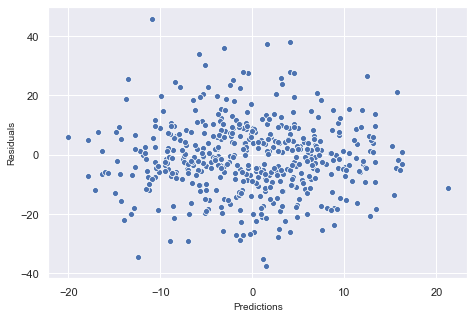

In [79]:
lr4.fit(X_te_1819,y_te_1819)

predictions1 = lr4.predict(X_te_1819)

residuals1 = y_te_1819 - predictions1

plt.figure(figsize = (7.5,5))
sns.scatterplot(predictions1,residuals1)
plt.xlabel('Predictions',size = 10)
plt.ylabel('Residuals',size = 10)

residuals1[residuals1 <0].mean()

### Polynomial Application with Lasso

In [41]:
# Poly transformation without make_pipeline
poly1 = PolynomialFeatures(2) #create new poly order you want to apply to X
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(2)
poly4 = PolynomialFeatures(2)



#Fit and transform on training and test data
polyX_1416 = poly1.fit_transform(X_tr_1416) #this takes the X and makes the poly combinations onto it
polyX_t_1617 = poly1.transform(X_te_1617)

polyX_1517 = poly2.fit_transform(X_tr_1517) #this takes the X and makes the poly combinations onto it
polyX_t_1718 = poly2.transform(X_te_1718)

polyX_1618 = poly3.fit_transform(X_tr_1618) #this takes the X and makes the poly combinations onto it
polyX_t_1819 = poly3.transform(X_te_1819)

polyX_1418 = poly4.fit_transform(X_tr_1418) #this takes the X and makes the poly combinations onto it
polyX_t_1819 = poly4.transform(X_te_1819)

#Standardize on each X
std1 = StandardScaler()
std1.fit(polyX_1416) #this gets the stds and means of the X values
polyX_std_1416 = std1.transform(polyX_1416) #applies to make it mean 0 and std 1
polyX_t_std_1617 = std1.transform(polyX_t_1617)

std2 = StandardScaler()
std2.fit(polyX_1517) #this gets the stds and means of the X values
polyX_std_1517 = std2.transform(polyX_1517) #applies to make it mean 0 and std 1
polyX_t_std_1718 = std2.transform(polyX_t_1718)

std3 = StandardScaler()
std3.fit(polyX_1618) #this gets the stds and means of the X values
polyX_std_1618 = std3.transform(polyX_1618) #applies to make it mean 0 and std 1
polyX_t_std_1819 = std3.transform(polyX_t_1819)

std4 = StandardScaler()
std4.fit(polyX_1418) #this gets the stds and means of the X values
polyX_std_1418 = std4.transform(polyX_1418) #applies to make it mean 0 and std 1
polyX_t_std_1819 = std4.transform(polyX_t_1819)


#Lasso
lasso_model1 = Lasso(alpha = 0.9)
lasso_model2 = Lasso(alpha = 0.9)
lasso_model3 = Lasso(alpha = 0.9)
lasso_model4 = Lasso(alpha = 0.9)

lasso_model1.fit(polyX_std_1416,y_tr_1416)
lasso_model2.fit(polyX_std_1517,y_tr_1517)
lasso_model3.fit(polyX_std_1618,y_tr_1618)
lasso_model4.fit(polyX_std_1418,y_tr_1418)


lasso_score1 = lasso_model1.score(polyX_std_1416,y_tr_1416),lasso_model1.score(polyX_t_std_1617,y_te_1617)
lasso_score2 = lasso_model2.score(polyX_std_1517,y_tr_1517),lasso_model2.score(polyX_t_std_1718,y_te_1718)
lasso_score3 = lasso_model3.score(polyX_std_1618,y_tr_1618),lasso_model3.score(polyX_t_std_1819,y_te_1819)
lasso_score4 = lasso_model4.score(polyX_std_1418,y_tr_1418),lasso_model4.score(polyX_t_std_1819,y_te_1819)

In [42]:
print("2014-2016 to predict 16-17 season: ",lasso_score1)
print("2015-2017 to predict 17-18 season: ",lasso_score2)
print("2016-2018 to predict 18-19 season: ",lasso_score3)
print("2014-2017 to predict 18-19 season: ",lasso_score4)

2014-2016 to predict 16-17 season:  (0.19566109578766266, 0.0947782452224275)
2015-2017 to predict 17-18 season:  (0.15654517152102942, 0.14234067837100162)
2016-2018 to predict 18-19 season:  (0.17140923190619659, 0.15766435671741652)
2014-2017 to predict 18-19 season:  (0.16639388023537682, 0.16543882910653418)


In [43]:
#look at columns that have some effect on model
coeflist1 = list(zip(poly1.get_feature_names(X_tr_1416.columns), lasso_model1.coef_))
coeflist2 = list(zip(poly2.get_feature_names(X_tr_1517.columns), lasso_model2.coef_))
coeflist3 = list(zip(poly3.get_feature_names(X_tr_1618.columns), lasso_model3.coef_))
coeflist4 = list(zip(poly4.get_feature_names(X_tr_1418.columns), lasso_model4.coef_))

coefdf1 = pd.DataFrame(coeflist1,columns = ['column','coef'])
coefdf2 = pd.DataFrame(coeflist2,columns = ['column','coef'])
coefdf3 = pd.DataFrame(coeflist3,columns = ['column','coef'])
coefdf4 = pd.DataFrame(coeflist4,columns = ['column','coef'])

In [44]:
coefdf1.reindex(coefdf1.coef.abs().sort_values(ascending = False).index).head(10)

,column,coef
1591,Avg Team PF Avg Win% Diff,1.777209
2155,Avg Opp 3P% Avg Win% Diff,1.439876
2159,Avg Opp 3P% Avg ORtg Diff,1.041595
747,Avg Team FT Team B2B?,-0.586654
574,Avg Team 3PA Avg Opp PF,0.568868
3088,Opp West? Avg BLK Diff,0.476826
2985,Opp B2B? Avg BLK Diff,0.266975
2994,Team West? Opp West?,-0.263696
612,Avg Team 3PA Avg 3PA Diff,0.206042
2930,Team B2B? Avg AST Diff,0.156378


In [45]:
coefdf2.reindex(coefdf2.coef.abs().sort_values(ascending = False).index).head(10)

,column,coef
2770,Avg Opp TOV Avg Win% Diff,2.813446
3094,Opp West? Avg eFG% Diff,0.544183
4015,Avg BLK Sum Avg Win% Diff,0.477983
3170,opp_avg_allowed Avg PF Sum,0.400752
553,Avg Team 3PA Avg Team BLK,0.325616
598,Avg Team 3PA Avg ORB Sum,0.298420
2941,Opp B2B? Team West?,0.275224
2889,Team B2B? Opp West?,-0.233572
1906,Avg Opp FG % team_avg_allowed,-0.191016
3167,opp_avg_allowed Avg STL Sum,0.152335


In [46]:
coefdf3.reindex(coefdf3.coef.abs().sort_values(ascending = False).index).head(10)

,column,coef
4357,Avg Win% Diff Date_indic,2.671868
2436,Avg Opp DRB Opp eFG%,-0.854092
3149,opp_avg_allowed Team ORtg,0.450438
2987,Opp B2B? Avg PF Diff,-0.408884
3036,Team West? Avg STL Diff,0.285236
3087,Opp West? Avg STL Diff,0.278716
3311,Team ORtg Avg PF Sum,0.265356
3091,Opp West? Avg Win% Diff,0.263373
598,Avg Team 3PA Avg ORB Sum,0.251724
1617,Team_Win_Pct Opp B2B?,0.229817


In [47]:
coefdf4.reindex(coefdf4.coef.abs().sort_values(ascending = False).index).head(10)

,column,coef
1591,Avg Team PF Avg Win% Diff,1.423455
4066,Avg PF Sum Avg Win% Diff,1.043459
2826,Avg Opp PF Avg Win% Diff,0.908248
2436,Avg Opp DRB Opp eFG%,-0.459854
1427,Avg Team BLK Avg 3PA Diff,0.449130
2774,Avg Opp TOV Avg ORtg Diff,0.382666
2987,Opp B2B? Avg PF Diff,-0.241226
2785,Avg Opp PF Team ORtg,0.200655
3311,Team ORtg Avg PF Sum,0.190918
3088,Opp West? Avg BLK Diff,0.190578


### No Polynomial Transformation - Lasso

In [48]:
std1 = StandardScaler()
std2 = StandardScaler()
std3 = StandardScaler()
std4 = StandardScaler()

#Fits this X to this standard scaler
std1.fit(X_tr_1416) 
std2.fit(X_tr_1517) 
std3.fit(X_tr_1618) 
std4.fit(X_tr_1418) 

X_tr_1416_std = std1.transform(X_tr_1416) #applies to make it mean 0 and std 1
X_tr_1517_std = std2.transform(X_tr_1517) #applies to make it mean 0 and std 1
X_tr_1618_std = std3.transform(X_tr_1618) #applies to make it mean 0 and std 1
X_tr_1418_std = std4.transform(X_tr_1418) #applies to make it mean 0 and std 1

X_te_1617_std = std1.transform(X_te_1617)
X_te_1718_std = std2.transform(X_te_1718)
X_te_1819_std = std3.transform(X_te_1819)

lasso_model1 = LassoCV(alphas = np.linspace(0,0.1,100))
lasso_model2 = LassoCV(alphas = np.linspace(0,0.1,100))
lasso_model3 = LassoCV(alphas = np.linspace(0,0.1,100))
lasso_model4 = LassoCV(alphas = np.linspace(0,0.1,100))

lasso_model1.fit(X_tr_1416_std,y_tr_1416)
lasso_model2.fit(X_tr_1517_std,y_tr_1517)
lasso_model3.fit(X_tr_1618_std,y_tr_1618)
lasso_model4.fit(X_tr_1418_std,y_tr_1418)

noPolyLassoScore1 = lasso_model1.score(X_tr_1416_std,y_tr_1416),lasso_model1.score(X_te_1617_std,y_te_1617)
noPolyLassoScore2 = lasso_model2.score(X_tr_1517_std,y_tr_1517),lasso_model2.score(X_te_1718_std,y_te_1718)
noPolyLassoScore3 = lasso_model3.score(X_tr_1618_std,y_tr_1618),lasso_model3.score(X_te_1819_std,y_te_1819)
noPolyLassoScore4 = lasso_model4.score(X_tr_1418_std,y_tr_1418),lasso_model4.score(X_te_1819_std,y_te_1819)



//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.415647257410455, tolerance: 12.964473714285715
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.15510497620562, tolerance: 12.964473714285715
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 681.2342311021494, tolerance: 13.861762714285712
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.1380419667403, tolerance: 13.861762714285712
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3563.4797298431513, tolerance: 13.861762714285712
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.032253973433399, tolerance: 11.753861356932152
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.24795417310088, tolerance: 11.753861356932152
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.655612132148235, tolerance: 11.753861356932152
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298.79137231870845, tolerance: 13.149399410898381
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522.3167087236361, tolerance: 13.149399410898381
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782.7202902321005, tolerance: 13.149399410898381
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

In [49]:
print("2014-2016 to predict 16-17 season: ",noPolyLassoScore1)
print("2015-2017 to predict 17-18 season: ",noPolyLassoScore2)
print("2016-2018 to predict 18-19 season: ",noPolyLassoScore3)
print("2014-2017 to predict 18-19 season: ",noPolyLassoScore4)

2014-2016 to predict 16-17 season:  (0.2208145959608495, 0.09450253731423275)
2015-2017 to predict 17-18 season:  (0.18119521751101986, 0.16661993849309842)
2016-2018 to predict 18-19 season:  (0.1956038347981067, 0.15891011828743262)
2014-2017 to predict 18-19 season:  (0.19616925826327825, 0.161843269676325)


### Ridge Regression

In [50]:
#create new poly order you want to apply to X

train_data = [X_tr_1416,X_tr_1517,X_tr_1618,X_tr_1418]
train_data_Y = [y_tr_1416,y_tr_1517,y_tr_1618,y_tr_1418]
test_data = [X_te_1617,X_te_1718,X_te_1819,X_te_1819]
test_data_Y = [y_te_1617,y_te_1718,y_te_1819,y_te_1819]

scores_rr = []
for i in range(0,4):
    std = StandardScaler()
    std.fit(train_data[i]) #this gets the stds and means of the X values
    polyX_std = std.transform(train_data[i]) #applies to make it mean 0 and std 1
    polyX_t_std = std.transform(test_data[i])
    #Ridge
    lr_model_ridge = RidgeCV(alphas = 10**np.linspace(-5,5,500))
    lr_model_ridge.fit(polyX_std,train_data_Y[i])
    scores_rr.append([lr_model_ridge.score(polyX_std,train_data_Y[i]),lr_model_ridge.score(polyX_t_std,test_data_Y[i])])
print(scores_rr)

[[0.2171148899822759, 0.09983694116757003], [0.17514979053018287, 0.17194976431501896], [0.18995587781144863, 0.1629253157947621], [0.1964961583152269, 0.1658057296277492]]


### Ridge Regression - w/Poly [BEST]

In [51]:
#create new poly order you want to apply to X

train_data = [X_tr_1416,X_tr_1517,X_tr_1618,X_tr_1418]
train_data_Y = [y_tr_1416,y_tr_1517,y_tr_1618,y_tr_1418]
test_data = [X_te_1617,X_te_1718,X_te_1819,X_te_1819]
test_data_Y = [y_te_1617,y_te_1718,y_te_1819,y_te_1819]
scores = []
for i in range(0,4):
    poly = PolynomialFeatures(2) #Fit and transform on training data
    polyX = poly.fit_transform(train_data[i]) #this takes the X and makes the poly combinations onto it
    polyX_t = poly.transform(test_data[i])
    #Standardize on each X
    std = StandardScaler()
    std.fit(polyX) #this gets the stds and means of the X values
    polyX_std = std.transform(polyX) #applies to make it mean 0 and std 1
    polyX_t_std = std.transform(polyX_t)
    #Ridge
    lr_model_ridge = Ridge(alpha = 36000)
    lr_model_ridge.fit(polyX_std,train_data_Y[i])
    scores.append([lr_model_ridge.score(polyX_std,train_data_Y[i]),lr_model_ridge.score(polyX_t_std,test_data_Y[i])])
print(scores)

[[0.21779545202145378, 0.09217935416446632], [0.17756586897560936, 0.16943861811046845], [0.1938114723180996, 0.16276964779468173], [0.20048846169093093, 0.16591218552942888]]


In [52]:
train_data = [X_tr_1416,X_tr_1517,X_tr_1618,X_tr_1418_new]
train_data_Y = [y_tr_1416,y_tr_1517,y_tr_1618,y_tr_1418]
test_data = [X_te_1617,X_te_1718,X_te_1819,X_te_1819_new]
test_data_Y = [y_te_1617,y_te_1718,y_te_1819,y_te_1819]
scores = []

for i in range(0,4):
    poly = PolynomialFeatures(2) #Fit and transform on training data
    polyX = poly.fit_transform(train_data[i]) #this takes the X and makes the poly combinations onto it
    polyX_t = poly.transform(test_data[i])
    #Standardize on each X
    std = StandardScaler()
    std.fit(polyX) #this gets the stds and means of the X values
    polyX_std = std.transform(polyX) #applies to make it mean 0 and std 1
    polyX_t_std = std.transform(polyX_t)
    #Ridge
    lr_model_ridge = Ridge(alpha = 36000)
    lr_model_ridge.fit(polyX_std,train_data_Y[i])
    scores.append([lr_model_ridge.score(polyX_std,train_data_Y[i]),lr_model_ridge.score(polyX_t_std,test_data_Y[i])])
print(scores)

NameError: name 'X_tr_1418_new' is not defined

In [ ]:
train_data = [X_tr_1416,X_tr_1517,X_tr_1618,X_tr_1418]
train_data_Y = [y_tr_1416,y_tr_1517,y_tr_1618,y_tr_1418]
test_data = [X_te_1617,X_te_1718,X_te_1819,X_te_1819]
test_data_Y = [y_te_1617,y_te_1718,y_te_1819,y_te_1819]

from sklearn.linear_model import ElasticNet

poly = PolynomialFeatures(2) #Fit and transform on training data
polyX = poly.fit_transform(X_tr_1418_new) #this takes the X and makes the poly combinations onto it
polyX_t = poly.transform(X_te_1819_new)
#Standardize on each X
std = StandardScaler()
std.fit(polyX) #this gets the stds and means of the X values
polyX_std = std.transform(polyX) #applies to make it mean 0 and std 1
polyX_t_std = std.transform(polyX_t)

regr = ElasticNet(random_state=0)
regr.fit(polyX_std, y_tr_1418)  
regr.score(polyX_std,y_tr_1418),regr.score(polyX_t_std,y_te_1819)


In [ ]:
# Add New Feature - Test

X_tr_1418_new = X_tr_1418.copy()
y_tr_1418_new = y_tr_1418.copy()
X_te_1819_new = X_te_1819.copy()

std_new = StandardScaler()
std_new.fit(X_tr_1418_new) #this gets the stds and means of the X values
polyX_std_new = std_new.transform(X_tr_1418_new) #applies to make it mean 0 and std 1
polyX_t_std_new = std_new.transform(X_te_1819_new)
#Ridge
lr_model_ridge_new = RidgeCV(alphas = 10**np.linspace(-5,5,500))
lr_model_ridge_new.fit(polyX_std_new,y_tr_1418_new)

y_pred_new = lr_model_ridge_new.predict(polyX_std_new)
y_pred_test = lr_model_ridge_new.predict(polyX_t_std_new)
# y_pred[1] = y_pred[1] + 7
# r2_score(y_te_1617,y_pred)

In [ ]:
y_pred_df_new = pd.DataFrame(y_pred_new,columns = ['y_pred_score'])
y_pred_df_test = pd.DataFrame(y_pred_test,columns = ['y_pred_score'])


In [ ]:
def new_feat(row):
    if abs(row['Avg 3P Diff']) >= 2 and abs(row['Avg Win% Diff']) >= 0.2 and abs(row['Avg ORtg Diff']) >= 4.5:
        return(1)
    return(0)

In [ ]:
X_tr_1418_new['AdvOff'] = X_tr_1418_new.apply(new_feat,axis=1)
X_te_1819_new['AdvOff'] = X_te_1819_new.apply(new_feat,axis=1)

In [ ]:
new_pred_df = pd.concat([X_tr_1418_new,y_pred_df_new],axis=1)
new_pred_test = pd.concat([X_te_1819_new.reset_index(),y_pred_df_test],axis=1)

In [ ]:
def new_pred(row):
    if row['AdvOff'] == 1 and row['y_pred_score'] > 0:
        y = row['y_pred_score'] + 0
    elif row['AdvOff'] == 1 and row['y_pred_score'] < 0:
        y = row['y_pred_score'] - 0
    else:
        y = row['y_pred_score']
    return(y)
        

new_pred_test['new_y_pred'] = new_pred_test.apply(new_pred,axis=1)

new_pred_test.head(10)

r2_score(y_te_1819,new_pred_test['new_y_pred'])

In [ ]:
nba_odds = pd.read_csv('/Users/jeromerufin/Desktop/18_19_odds.csv')

In [ ]:
coeflist = list(zip(poly.get_feature_names(X_tr_1418.columns), lr_model_ridge.coef_))

coefdf = pd.DataFrame(coeflist,columns = ['column','coef'])

coefdf.reindex(coefdf.coef.abs().sort_values(ascending = False).index).head(10)

Added Most Notable Lasso Coefs to Base Model

In [ ]:
#Add above data columns to base model and run model
new_train = nba_14_18
new_test = nba_18_19

new_train['Avg Opp DRB Opp eFG%'] = new_train['Avg Opp DRB']*new_train['Opp eFG%']
new_train['Avg Opp DRB Opp ORtg'] = new_train['Avg Opp DRB']*new_train['Opp ORtg']
# new_train['Avg Opp BLK Team B2B?'] = new_train['Avg Opp BLK']* new_train['Team B2B?']
new_train['Avg Opp DRB Opp TS%'] = new_train['Avg Opp DRB']*new_train['Opp TS%']
new_train['Avg Opp 3PA Avg Opp BLK'] = new_train['Avg Opp 3PA']*new_train['Avg Opp BLK']

new_test['Avg Opp DRB Opp eFG%'] = new_test['Avg Opp DRB']*new_test['Opp eFG%']
new_test['Avg Opp DRB Opp ORtg'] = new_test['Avg Opp DRB']*new_test['Opp ORtg']
# new_test['Avg Opp BLK Team B2B?'] = new_test['Avg Opp BLK']* new_train['Team B2B?']
new_test['Avg Opp DRB Opp TS%'] = new_test['Avg Opp DRB']*new_test['Opp TS%']
new_test['Avg Opp 3PA Avg Opp BLK'] = new_test['Avg Opp 3PA']*new_test['Avg Opp BLK']

### Predictions/Residual Analysis - More Feature Engineering

In [ ]:
train_data = [X_tr_1416,X_tr_1517,X_tr_1618,X_tr_1418]
train_data_Y = [y_tr_1416,y_tr_1517,y_tr_1618,y_tr_1418]
test_data = [X_te_1617,X_te_1718,X_te_1819,X_te_1819]
test_data_Y = [y_te_1617,y_te_1718,y_te_1819,y_te_1819]

def make_poly(X_train):
    poly = PolynomialFeatures(2) 
    polyX = poly.fit_transform(X_train) 
    return(polyX)

def std(X_train):
    std = StandardScaler()
    std.fit(X_train) 
    X_tr_std = std.transform(X_train)
    return(X_tr_std)


791    -46.374580
1264   -44.756723
804    -41.805124
1421   -39.379405
904    -38.298377
463    -37.833950
2046   -37.249421
476    -36.942923
107    -35.429069
1831   -34.372430
81     -34.150060
1017   -33.881744
219    -33.712842
76     -33.278843
810    -32.160597
1236   -31.716957
2037   -31.537029
1318   -30.986921
1229   -30.726502
485    -30.641435
635    -30.104784
627    -30.014411
691    -29.871201
75     -29.295240
497    -29.116637
15     -29.113349
1212   -28.500227
1194   -28.140456
1031   -27.436844
1015   -27.349017
          ...    
1772    27.119113
1148    27.221966
1365    27.307460
1019    27.948266
516     28.072293
332     28.505344
1274    28.846330
1919    29.525620
1189    29.561053
181     29.598092
1253    29.624289
955     29.713464
797     29.729598
1838    29.988635
1234    30.104448
1005    30.953293
1485    30.960680
534     31.491410
140     32.332047
210     32.423188
1284    33.410424
1835    33.462302
173     33.847366
1121    36.649147
1173    37

Text(0, 0.5, 'Residuals')

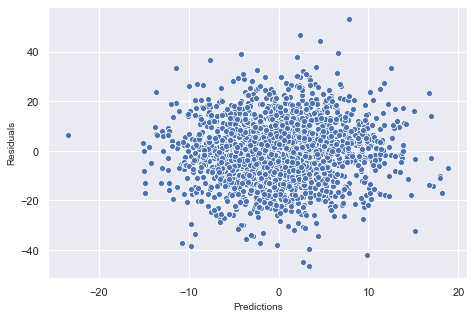

In [56]:
#prediction values for ridge poly model
# lr_model_ridge = Ridge(alpha = 36000)
# X_poly = std(make_poly(X_tr_1418))
# X_fit = lr_model_ridge.fit(X_poly,y_tr_1418)

predictions = lr_model_ridge.predict(polyX_std_1418)

residuals = y_tr_1418 - predictions

plt.figure(figsize = (7.5,5))
sns.scatterplot(predictions,residuals)
plt.xlabel('Predictions',size = 10)
plt.ylabel('Residuals',size = 10)

In [62]:
residuals[residuals < 0].mean()

-9.900299162380945

In [ ]:
pred_df = pd.DataFrame(predictions)
res_df = pd.DataFrame(residuals)
new_df = pd.concat([X_tr_1418,y_tr_1418,pred_df,res_df],axis=1)
new_df.columns

In [ ]:
new_df.columns = ['Avg Team Pts',      'Avg Team FG',     'Avg Team FGA',
          'Avg Team FG %',      'Avg Team 3P',     'Avg Team 3PA',
           'Avg Team 3P%',      'Avg Team FT',     'Avg Team FTA',
           'Avg Team FT%',     'Avg Team ORB',     'Avg Team DRB',
           'Avg Team TRB',     'Avg Team AST',     'Avg Team STL',
           'Avg Team BLK',     'Avg Team TOV',      'Avg Team PF',
           'Team_Win_Pct',      'Avg Opp Pts',       'Avg Opp FG',
            'Avg Opp FGA',     'Avg Opp FG %',       'Avg Opp 3P',
            'Avg Opp 3PA',      'Avg Opp 3P%',       'Avg Opp FT',
            'Avg Opp FTA',      'Avg Opp FT%',      'Avg Opp ORB',
            'Avg Opp DRB',      'Avg Opp TRB',      'Avg Opp AST',
            'Avg Opp STL',      'Avg Opp BLK',      'Avg Opp TOV',
             'Avg Opp PF',      'Opp_Win_Pct',        'Team B2B?',
               'Opp B2B?',       'Team West?',        'Opp West?',
       'team_avg_allowed',  'opp_avg_allowed',         'Team TS%',
              'Team eFG%',        'Team ORtg',          'Opp TS%',
               'Opp eFG%',         'Opp ORtg',      'Avg Pts Sum',
             'Avg FG Sum',      'Avg FGA Sum',      'Avg FG% Sum',
             'Avg 3P Sum',      'Avg 3PA Sum',      'Avg 3P% Sum',
             'Avg FT Sum',      'Avg FTA Sum',      'Avg FT% Sum',
            'Avg ORB Sum',      'Avg DRB Sum',      'Avg TRB Sum',
            'Avg AST Sum',      'Avg STL Sum',      'Avg BLK Sum',
            'Avg TOV Sum',       'Avg PF Sum',     'Avg Win% Sum',
           'Avg Pts Diff',      'Avg FG Diff',     'Avg FGA Diff',
           'Avg FG% Diff',      'Avg 3P Diff',     'Avg 3PA Diff',
           'Avg 3P% Diff',      'Avg FT Diff',     'Avg FTA Diff',
           'Avg FT% Diff',     'Avg ORB Diff',     'Avg DRB Diff',
           'Avg TRB Diff',     'Avg AST Diff',     'Avg STL Diff',
           'Avg BLK Diff',     'Avg TOV Diff',      'Avg PF Diff',
          'Avg Win% Diff',       'Date_indic','Avg TS% Diff',
          'Avg eFG% Diff',    'Avg ORtg Diff','Pts Difference',
                        'Predicted',   'Residual']


In [ ]:
def winner(row):
    if (row['Pts Difference'] > 0 and row['Predicted'] > 0) or (row['Pts Difference'] < 0 and row['Predicted'] < 0):
        return(1)
    return(0)

In [ ]:
new_df['Correct Winner'] = new_df.apply(winner,axis=1)
new_df.groupby('Correct Winner')['Correct Winner'].count()

9.44554721688095

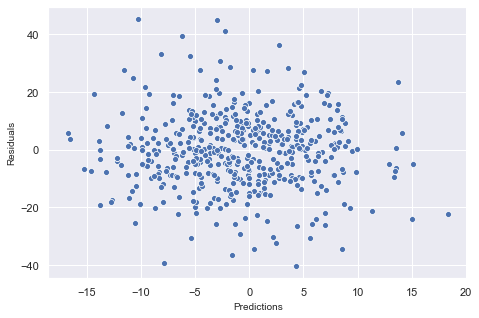

In [84]:
#prediction values for ridge poly model test
predictions_t = lr_model_ridge.predict(polyX_t_std_1819)

residuals_t = y_te_1819 - predictions_t
residuals_t.sort_values()

plt.figure(figsize = (7.5,5))
sns.scatterplot(predictions_t,residuals_t)
plt.xlabel('Predictions',size = 10)
plt.ylabel('Residuals',size = 10)
residuals_t[residuals_t > 0].mean()


In [ ]:
pred_df_t = pd.DataFrame(predictions_t).reset_index()
pred_df_t.columns = ['index','Predicted']
res_df_t = pd.DataFrame(residuals_t).reset_index()
res_df_t.columns = ['index','Residual']

del pred_df_t['index']
del res_df_t['index']

In [ ]:
X_t_reset = X_te_1819.reset_index()
y_t_reset = y_te_1819.reset_index()

In [ ]:
new_df_t = pd.concat([X_t_reset,y_t_reset,pred_df_t,res_df_t],axis=1)

In [ ]:
new_df_t.columns = ['Avg Team Pts',      'Avg Team FG',     'Avg Team FGA',
          'Avg Team FG %',      'Avg Team 3P',     'Avg Team 3PA',
           'Avg Team 3P%',      'Avg Team FT',     'Avg Team FTA',
           'Avg Team FT%',     'Avg Team ORB',     'Avg Team DRB',
           'Avg Team TRB',     'Avg Team AST',     'Avg Team STL',
           'Avg Team BLK',     'Avg Team TOV',      'Avg Team PF',
           'Team_Win_Pct',      'Avg Opp Pts',       'Avg Opp FG',
            'Avg Opp FGA',     'Avg Opp FG %',       'Avg Opp 3P',
            'Avg Opp 3PA',      'Avg Opp 3P%',       'Avg Opp FT',
            'Avg Opp FTA',      'Avg Opp FT%',      'Avg Opp ORB',
            'Avg Opp DRB',      'Avg Opp TRB',      'Avg Opp AST',
            'Avg Opp STL',      'Avg Opp BLK',      'Avg Opp TOV',
             'Avg Opp PF',      'Opp_Win_Pct',        'Team B2B?',
               'Opp B2B?',       'Team West?',        'Opp West?',
       'team_avg_allowed',  'opp_avg_allowed',         'Team TS%',
              'Team eFG%',        'Team ORtg',          'Opp TS%',
               'Opp eFG%',         'Opp ORtg',      'Avg Pts Sum',
             'Avg FG Sum',      'Avg FGA Sum',      'Avg FG% Sum',
             'Avg 3P Sum',      'Avg 3PA Sum',      'Avg 3P% Sum',
             'Avg FT Sum',      'Avg FTA Sum',      'Avg FT% Sum',
            'Avg ORB Sum',      'Avg DRB Sum',      'Avg TRB Sum',
            'Avg AST Sum',      'Avg STL Sum',      'Avg BLK Sum',
            'Avg TOV Sum',       'Avg PF Sum',     'Avg Win% Sum',
           'Avg Pts Diff',      'Avg FG Diff',     'Avg FGA Diff',
           'Avg FG% Diff',      'Avg 3P Diff',     'Avg 3PA Diff',
           'Avg 3P% Diff',      'Avg FT Diff',     'Avg FTA Diff',
           'Avg FT% Diff',     'Avg ORB Diff',     'Avg DRB Diff',
           'Avg TRB Diff',     'Avg AST Diff',     'Avg STL Diff',
           'Avg BLK Diff',     'Avg TOV Diff',      'Avg PF Diff',
          'Avg Win% Diff',       'Date_indic',   'Pts Difference',
                        'Predicted',   'Residual']


In [ ]:
# Look at massive outliers

outlierMask = np.logical_or(new_df_t['Residual'] >= 15,new_df_t['Residual'] <= -15)

new_df_t[outlierMask].head()

In [ ]:
print(new_df[winMask]['Avg 3P Diff'].abs().mean(),new_df[lossMask]['Avg 3P Diff'].abs().mean())
print(new_df[winMask]['Avg Win% Diff'].abs().mean(),new_df[lossMask]['Avg Win% Diff'].abs().mean())
print(new_df[winMask]['Avg ORtg Diff'].abs().mean(),new_df[lossMask]['Avg ORtg Diff'].abs().mean())

In [ ]:
# def pts_inc(row):

mask2 = new_df[winMask]['Avg 3P Diff'] > 0
new_df[mask2]['Avg 3P Diff'].mean()

In [ ]:
Pts_diff1 = ((new_df['Correct Winner'] ==1 ) & (new_df_t['Pts Difference']<0))

sns.distplot(new_df_t[Pts_diff1]['Pts Difference'],label='Pts Difference')
sns.distplot(new_df_t[Pts_diff1]['Predicted'],label='Predicted')
plt.legend()
plt.show()

In [ ]:
new_df[winMask].shape

In [ ]:
Pts_diff2 = ((new_df['Correct Winner'] ==1 ) & (new_df['Pts Difference']>0))

sns.distplot(new_df[Pts_diff2]['Pts Difference'])
sns.distplot(new_df[Pts_diff2]['Predicted'])



In [ ]:
new_df[lossMask].abs()['Pts Difference'].mean()

In [ ]:
winMask = new_df['Correct Winner'] ==1
lossMask = new_df['Correct Winner'] ==0